Checking if pytorch uses my GPU

In [25]:
import torch

print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0))

Torch version: 2.10.0+cu130
CUDA available: True
GPU name: NVIDIA GeForce RTX 4070 Ti SUPER


In [60]:
path = '/home/lautivuelos/machine-learning-zoomcamp-homework/08-deep-learning/clothing-dataset-small'

In [27]:
from PIL import Image
import numpy as np

In [28]:
img = Image.open(path + '/train/pants/0a7e5fe0-d592-40e6-b9b8-75aac9a2d685.jpg')

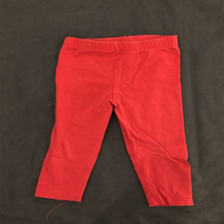

In [29]:
img.resize((224,224))

In [30]:
x = np.array(img.resize((224,224)))
x.shape

(224, 224, 3)

In [31]:
import torchvision.models as models
from torchvision import transforms

In [32]:
model = models.mobilenet_v2(weights = 'IMAGENET1K_V1')
model.eval();

In [50]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [34]:
preprocess(img)

tensor([[[-0.9363, -0.9192, -0.9192,  ..., -0.8164, -0.8164, -0.8164],
         [-0.9363, -0.9192, -0.9192,  ..., -0.8164, -0.8164, -0.8164],
         [-0.9363, -0.9192, -0.9192,  ..., -0.8164, -0.8164, -0.8164],
         ...,
         [-1.0733, -1.0904, -1.0733,  ..., -0.8849, -0.9192, -0.9534],
         [-1.0562, -1.0733, -1.0904,  ..., -0.9192, -0.9192, -0.9192],
         [-1.0733, -1.0733, -1.0904,  ..., -0.9192, -0.9192, -0.9020]],

        [[-0.9853, -0.9678, -0.9678,  ..., -0.8627, -0.8627, -0.8627],
         [-0.9853, -0.9678, -0.9678,  ..., -0.8627, -0.8627, -0.8627],
         [-0.9853, -0.9678, -0.9678,  ..., -0.8627, -0.8627, -0.8627],
         ...,
         [-1.0903, -1.1078, -1.0903,  ..., -0.9328, -0.9678, -1.0028],
         [-1.0728, -1.0903, -1.1078,  ..., -0.9678, -0.9678, -0.9678],
         [-1.0903, -1.0903, -1.1078,  ..., -0.9678, -0.9678, -0.9503]],

        [[-0.9156, -0.8981, -0.8981,  ..., -0.7936, -0.7936, -0.7936],
         [-0.9156, -0.8981, -0.8981,  ..., -0

In [35]:
x = preprocess(img)

In [37]:
# turning the tensor into a batch
batch_t = torch.unsqueeze(x, 0)

print(x.shape)
print(batch_t.shape)

torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


In [47]:
with torch.no_grad():
    output = model(batch_t)
print(output.shape)

torch.Size([1, 1000])


In [44]:
output, indices = torch.sort(output, descending = True)

In [42]:
indices

tensor([[885, 697, 842, 834, 841, 610, 869, 775, 608, 638, 824, 689, 501, 411,
         655, 796, 457, 911, 578, 474, 639, 602, 906, 459, 439, 543, 735, 399,
         903, 568, 615, 601, 400, 854, 416, 652, 614, 658, 643, 678, 512, 617,
         777, 702, 797, 496, 422, 414, 823, 808, 890, 589, 452, 473, 641, 731,
         477, 570, 502, 456, 588, 636, 684, 683, 515, 887, 667, 750, 806, 465,
         623, 591, 852, 917, 464, 445, 793, 715, 430, 514, 921, 763, 558, 490,
         451, 419, 894, 747, 764, 862, 513, 251, 585, 523, 529, 434, 752, 499,
         840, 837, 749, 813, 836, 253, 596, 447, 552, 433, 981, 741, 597, 630,
         542, 850, 711, 159, 819, 902, 795, 875, 158, 168, 774, 176, 722, 966,
         692, 285, 244, 676, 838, 593, 584, 160, 910, 417, 606, 830, 418, 566,
         195, 787, 487, 721, 999, 889, 784, 524, 242, 728, 616, 680, 557, 861,
         122, 587, 211, 462, 879, 882, 605, 831, 600, 790, 785, 805,  34, 607,
         165, 872, 880, 409, 760, 395, 681, 699, 182

In [48]:
# Load ImageNet class names
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

# Get top 5 predictions
top5_indices = indices[0, :5].tolist()
top5_classes = [categories[i] for i in top5_indices]

print("Top 5 predictions:")
for i, class_name in enumerate(top5_classes):
    print(f"{i+1}: {class_name}")

Top 5 predictions:
1: velvet
2: pajama
3: swimming trunks
4: suit
5: sweatshirt


In [49]:
import os
from torch.utils.data import Dataset

class ClothingDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.classes = sorted(os.listdir(data_dir))
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}

        for label_name in self.classes:
            label_dir = os.path.join(data_dir, label_name)
            for img_name in os.listdir(label_dir):
                self.image_paths.append(os.path.join(label_dir, img_name))
                self.labels.append(self.class_to_idx[label_name])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

In [51]:
input_size = 224

# ImageNet normalization values
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Simple transforms - just resize and normalize
train_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

val_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [61]:
from torch.utils.data import DataLoader

train_dataset = ClothingDataset(
    data_dir=f'{path}/train',
    transform=train_transforms
)

val_dataset = ClothingDataset(
    data_dir=f'{path}/validation',
    transform=val_transforms
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)